# Day 1: No Time for a Taxicab

## Part 1

Santa's sleigh uses a very high-precision clock to guide its movements, and the clock's oscillator is regulated by stars. Unfortunately, the stars have been stolen... by the Easter Bunny. To save Christmas, Santa needs you to retrieve all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

You're airdropped near Easter Bunny Headquarters in a city somewhere. "Near", unfortunately, is as close as you can get - the instructions on the Easter Bunny Recruiting Document the Elves intercepted start here, and nobody had time to work them out further.

The Document indicates that you should start at the given coordinates (where you just landed) and face North. Then, follow the provided sequence: either turn left (L) or right (R) 90 degrees, then walk forward the given number of blocks, ending at a new intersection.

There's no time to follow such ridiculous instructions on foot, though, so you take a moment and work out the destination. Given that you can only walk on the street grid of the city, how far is the shortest path to the destination?

For example:

- Following R2, L3 leaves you 2 blocks East and 3 blocks North, or 5 blocks away.
- R2, R2, R2 leaves you 2 blocks due South of your starting position, which is 2 blocks away.
- R5, L5, R5, R3 leaves you 12 blocks away.

How many blocks away is Easter Bunny HQ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
class Taxi:
    
    h_offset = [1, 0, -1, 0]
    v_offset = [0, 1, 0, -1]
    
    def __init__(self):
        self.x = 0
        self.y = 0
        self.direction = 0
        # N - 0, E - 1, S - 2, W - 3
        
    def move(self, instruction):
        
        #print(instruction[0],instruction[0]=="L")
        
        if instruction[0] == "L":
            rotate = -1
        else:
            rotate = 1
            
        self.direction = (self.direction + rotate) % 4
        
        hops = re.split(r'\D+',instruction)
        hops = int(hops[1])
        
        #print(self.direction, hops)
        
        for h in range(hops):
            self.x += self.h_offset[self.direction]
            self.y += self.v_offset[self.direction]
        #print(self.x, self.y)        
    def calc_dist(self):
        return abs(self.x) + abs(self.y)
    

In [3]:
def load_hops(path):
    file = open(path, "r")
    lines = file.readlines()
    
    lines = [l.split(", ") for l in lines]
    lines = lines[0]
    return lines

In [4]:
hops = load_hops("day01_data_test.txt")
taxi = Taxi()

for h in hops:
    taxi.move(h)

manhattan = taxi.calc_dist()
print(manhattan)


12


In [5]:
hops = load_hops("day01_data.txt")
taxi = Taxi()

for h in hops:
    taxi.move(h)

manhattan = taxi.calc_dist()
print(manhattan)

241


## Part 2

Then, you notice the instructions continue on the back of the Recruiting Document. Easter Bunny HQ is actually at the first location you visit twice.

For example, if your instructions are R8, R4, R4, R8, the first location you visit twice is 4 blocks away, due East.

How many blocks away is the first location you visit twice?

In [18]:
class Taxi:
    
    h_offset = [1, 0, -1, 0]
    v_offset = [0, 1, 0, -1]
    
    def __init__(self):
        self.x = 0
        self.y = 0
        self.direction = 0
        # N - 0, E - 1, S - 2, W - 3
        
        self.history = set()
        # creates an empty set to store all the positions previously visited
        self.history_ordered = []
        
    def move(self, instruction):
        
        #print(instruction[0],instruction[0]=="L")
        
        if instruction[0] == "L":
            rotate = -1
        else:
            rotate = 1
            
        self.direction = (self.direction + rotate) % 4
        
        hops = re.split(r'\D+',instruction)
        hops = int(hops[1])
        
        #print(self.direction, hops)
        
        for h in range(hops):
            self.x += self.h_offset[self.direction]
            self.y += self.v_offset[self.direction]
            
            if (self.x, self.y) in self.history: # checks new position isn't in history 
                #print(self.history)
                #print(self.x,self.y)
                
                return True
            
            self.history.add((self.x, self.y)) # otherwise add position to history 
            self.history_ordered.append([self.x, self.y])
            
        #print(self.x, self.y)        
    def calc_dist(self):
        return abs(self.x) + abs(self.y)

In [19]:
hops = load_hops("day01_data.txt")
taxi = Taxi()

for h in hops:
    taxi.move(h)
    
taxi.calc_dist()

104

In [20]:
taxi.history

{(-185, -52),
 (-185, -51),
 (-185, -50),
 (-185, -49),
 (-185, -48),
 (-184, -52),
 (-184, -48),
 (-183, -52),
 (-183, -48),
 (-182, -52),
 (-182, -48),
 (-182, -47),
 (-182, -46),
 (-182, -45),
 (-182, -44),
 (-182, -43),
 (-181, -52),
 (-181, -43),
 (-180, -52),
 (-180, -45),
 (-180, -44),
 (-180, -43),
 (-179, -52),
 (-179, -45),
 (-178, -52),
 (-178, -46),
 (-178, -45),
 (-178, 8),
 (-178, 9),
 (-178, 10),
 (-178, 11),
 (-177, -52),
 (-177, -51),
 (-177, -50),
 (-177, -49),
 (-177, -48),
 (-177, -47),
 (-177, -46),
 (-177, -45),
 (-177, -44),
 (-177, -43),
 (-177, 8),
 (-177, 11),
 (-176, -52),
 (-176, -51),
 (-176, -47),
 (-176, -46),
 (-176, -45),
 (-176, -44),
 (-176, -43),
 (-176, 8),
 (-176, 11),
 (-175, -52),
 (-175, -51),
 (-175, 8),
 (-175, 11),
 (-174, -52),
 (-174, -51),
 (-174, -50),
 (-174, -49),
 (-174, -48),
 (-174, -47),
 (-174, -46),
 (-174, -45),
 (-174, -44),
 (-174, -43),
 (-174, -42),
 (-174, -41),
 (-174, -40),
 (-174, -39),
 (-174, -38),
 (-174, -37),
 (-174,

AttributeError: 'list' object has no attribute 'get_label'

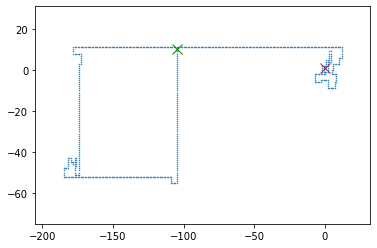

In [30]:
x = np.asarray(list(taxi.history_ordered))

[max_x, max_y] = np.max(x,0)
[min_x, min_y] = np.min(x,0)

num_points = len(x)

line = plt.plot(x[:,0], x[:,1],'.',markersize=1,label='Path')
start = plt.plot(x[0,0], x[0,1],'rx',markersize=10,label='Start')
end = plt.plot(x[-1,0], x[-1,1],'gx',markersize=10,label='End')
plt.axis([min_x-20, max_x+20, min_y-20, max_y+20])
plt.legend(handles=[line, start, end])

plt.show()

In [23]:
hops = load_hops("day01_data.txt")
taxi = Taxi()

for h in hops:
    if taxi.move(h):
        break
    
taxi.calc_dist()

116

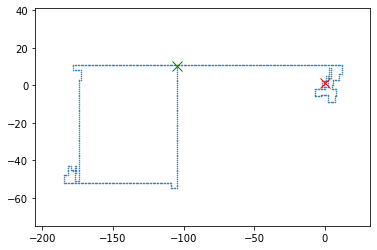

In [24]:
x = np.asarray(list(taxi.history_ordered))

num_points = len(x)

plt.plot(x[:,0], x[:,1],'.',markersize=1)
plt.plot(x[0,0], x[0,1],'rx',markersize=10)
plt.plot(x[-1,0], x[-1,1],'gx',markersize=10)
plt.axis([min_x-20, max_x+20, min_y-20, max_y+20])
plt.legend()
plt.show()